In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [60]:
import numpy as np 
import pandas as pd

import seaborn as sns
from scipy.stats import norm, skew

import fastai
from fastai.tabular import *

import os

In [3]:
pd.set_option('max_columns', 999)

In [4]:
PATH = os.getcwd()
PATH

'/home/ubuntu/kaggles/houses'

# Load data
Loaded train csv (split to train and validation) and test csv to Pandas df

In [69]:
cat_names = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BsmtCond',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
            'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFinSF1', 'BsmtFinSF2']
cont_names = ['LotFrontage', 'LotArea', 'MasVnrArea',    '1stFlrSF', '2ndFlrSF',
              'GrLivArea',  'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
#               'BsmtUnfSF', 
#               'TotalBsmtSF', 
#               'GarageArea',
             ]
all_columns = cat_names + cont_names
dep_var = 'SalePrice'

In [50]:
dtypes_cat = {cat:'category' for cat in cat_names}
dtypes_cont = {cont:np.float32 for cont in cont_names}
dtypes = {**dtypes_cat, **dtypes_cont, dep_var:np.float32}
# dtypes

In [51]:
train_csv_df = pd.read_csv(f'{PATH}/data/train.csv', dtype=dtypes, na_values=['NA'])
train_csv_df = train_csv_df[all_columns+[dep_var]]
train_csv_df["LotFrontage"] = train_csv_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
train_csv_df["MasVnrArea"] = train_csv_df["MasVnrArea"].fillna(0)
train_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
BsmtCond         1423 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null category
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType   

In [53]:
train_csv_df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,BsmtFinSF1,BsmtFinSF2,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,TA,TA,Y,0,0,0,2,2008,WD,Normal,706,0,65.0,8450.0,196.0,856.0,854.0,0.0,1710.0,0.0,61.0,0.0,12.247699
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,TA,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,TA,TA,Y,0,0,0,5,2007,WD,Normal,978,0,80.0,9600.0,0.0,1262.0,0.0,0.0,1262.0,298.0,0.0,0.0,12.109016
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,TA,TA,Y,0,0,0,9,2008,WD,Normal,486,0,68.0,11250.0,162.0,920.0,866.0,0.0,1786.0,0.0,42.0,0.0,12.317171
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Gd,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,TA,TA,Y,272,0,0,2,2006,WD,Abnorml,216,0,60.0,9550.0,0.0,961.0,756.0,0.0,1717.0,0.0,35.0,0.0,11.849405
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,TA,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,TA,TA,Y,0,0,0,12,2008,WD,Normal,655,0,84.0,14260.0,350.0,1145.0,1053.0,0.0,2198.0,192.0,84.0,0.0,12.429220


In [54]:
test_csv_df = pd.read_csv(f'{PATH}/data/test.csv', index_col='Id', dtype=dtypes)
test_csv_df = test_csv_df[all_columns]
test_csv_df["LotFrontage"] = test_csv_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_csv_df["MasVnrArea"] = test_csv_df["MasVnrArea"].fillna(0)
test_csv_df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,BsmtFinSF1,BsmtFinSF2,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,TA,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961,Unf,1,TA,TA,Y,0,0,0,6,2010,WD,Normal,468,144,80.0,11622.0,0.0,896.0,0.0,0.0,896.0,140.0,0.0,120.0
1462,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,TA,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958,Unf,1,TA,TA,Y,0,0,0,6,2010,WD,Normal,923,0,81.0,14267.0,108.0,1329.0,0.0,0.0,1329.0,393.0,36.0,0.0
1463,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,TA,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,No,GLQ,Unf,GasA,Gd,Y,SBrkr,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,TA,TA,Y,0,0,0,3,2010,WD,Normal,791,0,74.0,13830.0,0.0,928.0,701.0,0.0,1629.0,212.0,34.0,0.0
1464,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,TA,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,TA,TA,Y,0,0,0,6,2010,WD,Normal,602,0,78.0,9978.0,20.0,926.0,678.0,0.0,1604.0,360.0,36.0,0.0
1465,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,TA,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,No,ALQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992,RFn,2,TA,TA,Y,0,0,0,1,2010,WD,Normal,263,0,43.0,5005.0,0.0,1280.0,0.0,0.0,1280.0,0.0,82.0,144.0


In [55]:
cat_sz = [(c, len(train_csv_df[c].cat.categories)+1) for c in cat_names]
# cat_sz

In [56]:
emb_szs = {c: min(50, (c+1)//2) for _,c in cat_sz}
# emb_szs

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


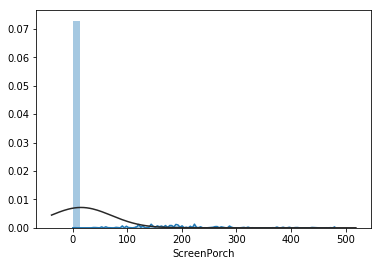

In [70]:
#LotArea - show plot skew
sns.distplot(train_csv_df['ScreenPorch'] , fit=norm);

In [68]:
train_csv_df[train_csv_df['LowQualFinSF']>0].shape

(26, 72)

In [57]:
#Skew
skewed_feats = train_csv_df[cont_names].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[skewness['Skew']>0.75]

,Skew
LotArea,12.195138
LowQualFinSF,9.002082
ScreenPorch,4.117977
MasVnrArea,2.674865
OpenPorchSF,2.361912
LotFrontage,2.210684
WoodDeckSF,1.539791
1stFlrSF,1.375342
GrLivArea,1.365156
2ndFlrSF,0.812194


In [ ]:
train_csv_df['LotArea'] = np.log1p(train_csv_df['LotArea'])
train_csv_df["SalePrice"] = np.log1p(train_csv_df["SalePrice"])

# Models

In [13]:
procs = [FillMissing, Categorify, Normalize]

In [14]:
test_data = TabularList.from_df(test_csv_df, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs )

In [15]:
data = (
    TabularList.from_df(train_csv_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         no_split()
        .random_split_by_pct(valid_pct=0.2, seed=1337)
        .label_from_df(cols=dep_var, label_cls=FloatList)
        .add_test(test_data)
        .databunch(bs=128, num_workers=8 )
)

In [16]:
data.show_batch(rows=10)

MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,BsmtFinSF1,BsmtFinSF2,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal,target
20,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,TA,Norm,Norm,1Fam,1Story,7,5,1996,1996,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1996,Fin,2,TA,TA,Y,154,0,0,3,2010,WD,Normal,919,0,-0.4982,0.0145,1.2908,1.3980,-0.8118,-0.1197,0.3562,1.1784,0.1449,-0.2771,-0.0860,12.469978332519531
60,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,ClearCr,TA,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,PConc,Ex,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,7,Typ,0,#na#,Attchd,1996,RFn,2,TA,TA,Y,0,0,0,4,2010,WD,Normal,1201,0,0.4067,0.3815,-0.5720,0.3551,1.3570,-0.1197,1.3582,1.6323,-0.0364,-0.2771,-0.0860,12.700772285461426
120,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,TA,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,Ex,TA,PConc,Ex,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2005,RFn,2,TA,TA,Y,0,0,0,7,2008,WD,Normal,28,0,-0.3259,-0.1734,2.8228,1.3073,-0.8118,-0.1197,0.2894,3.2455,0.3866,-0.2771,-0.0860,12.491255760192871
120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,TA,Norm,Norm,TwnhsE,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005,Fin,2,TA,TA,Y,0,0,0,4,2006,WD,Normal,16,0,-1.1877,-0.8020,0.2271,0.8589,-0.8118,-0.1197,-0.0409,0.3839,-0.3991,-0.2771,-0.0860,12.271349906921387
160,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,TA,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,0,0,1,1,3,1,TA,7,Min1,0,#na#,Attchd,1970,Unf,2,TA,TA,Y,0,0,0,5,2009,WD,Normal,765,0,-2.0065,-0.8715,1.1475,-1.0078,0.5522,-0.1197,-0.3025,-0.7672,-0.1573,-0.2771,-0.0860,11.736077308654785
120,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,TA,Norm,Norm,TwnhsE,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005,RFn,2,TA,TA,Y,0,0,0,6,2006,WD,Normal,659,0,-1.1877,-0.3669,0.7507,0.5012,-0.8118,-0.1197,-0.3044,0.7892,-0.1573,-0.2771,-0.0860,12.13270092010498
20,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Fa,Norm,Norm,1Fam,1Story,6,5,1986,1986,Gable,CompShg,VinylSd,Plywood,Stone,TA,TA,CBlock,Gd,No,ALQ,LwQ,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,7,Min2,1,TA,Attchd,1986,Fin,2,TA,TA,Y,0,0,0,11,2008,WD,Normal,1398,208,-1.0153,0.2109,0.1555,1.2242,-0.8118,-0.1197,0.2282,0.7892,-0.7013,-0.2771,-0.0860,12.122696876525879
60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2007,Fin,3,TA,TA,Y,0,0,0,10,2007,New,Partial,984,0,0.2774,-0.0531,0.6405,0.2947,2.4027,-0.1197,2.1672,0.2056,2.0789,2.7199,-0.0860,12.858322143554688
60,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,TA,Norm,Norm,1Fam,2Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,No,Rec,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,7,Typ,0,#na#,Attchd,2003,RFn,2,TA,TA,Y,0,0,0,5,2008,WD,Normal,503,0,-0.2828,-0.1796,-0.5720,-0.7584,1.1524,-0.1197,0.3710,0.9838,0.1449,-0.2771,-0.0860,12.242891311645508
60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,TA,Norm,Norm,1Fam,2Story,9,5,2006,

In [17]:
learner = tabular_learner(data, layers=[100], emb_drop=0.15, ps = 0.3, emb_szs=emb_szs,  
                          metrics=[root_mean_squared_error])
# learner.summary()

In [18]:
# lr = 1
# learner.lr_find()
# learner.recorder.plot()

In [19]:
learner.fit(epochs=140, lr=0.1)

epoch,train_loss,valid_loss,root_mean_squared_error
1,58.284134,11.277814,3.538449
2,31.419415,4.471489,2.146093
3,20.731371,4.106550,2.075520
4,14.780247,0.221388,0.553898
5,11.125159,0.304022,0.766008
6,8.683746,0.332653,0.663882
7,6.989823,0.627143,0.909028
8,5.728019,0.266671,0.635269
9,4.761242,0.071957,0.478787
10,4.006230,0.118172,0.567859


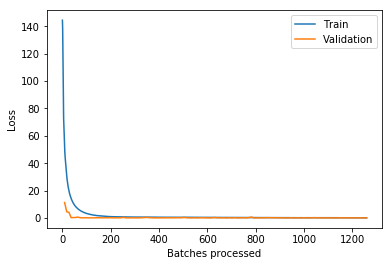

In [20]:
learner.recorder.plot_losses()

In [21]:
predicted, _ = learner.get_preds(ds_type=DatasetType.Test)
predicted = np.expm1(predicted)
len(predicted)

1459

In [22]:
test_csv_df_idx = test_csv_df.index.tolist()
predicted_list = list(zip(test_csv_df_idx, sum(predicted.tolist(), [])))
submission_df = pd.DataFrame(data=predicted_list, columns=['Id','SalePrice'])
print(submission_df.shape)
print(submission_df.head())

(1459, 2)
     Id      SalePrice
0  1461  127443.218750
1  1462  144445.000000
2  1463  179250.859375
3  1464  197083.937500
4  1465  168749.359375


In [23]:
submission_file = 'submission-nn.csv'
submission_file_comment = 
"""preprocessing of features added
tabular_learner(data, layers=[100], emb_drop=0.15, ps = 0.3, emb_szs=emb_szs, metrics=[root_mean_squared_error]
learner.fit(epochs=140, lr=0.1)"""
submission_df.to_csv(submission_file, index=False)

In [24]:
from IPython.display import FileLink, FileLinks

FileLink(submission_file)

/home/ubuntu/kaggles/houses/submission-nn.csv

In [25]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f {submission_file} -m "{submission_file_comment}"

100%|██████████████████████████████████████| 25.7k/25.7k [00:03<00:00, 7.68kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques